In [1]:
import torch
import torch.nn as nn
import math

### Input Embedding Layer

In [2]:
class InputEmbeddings(nn.Module):

    def __init__(self, d_model: int, vocab_size: int):
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model)


In [3]:
# Example I have a cat
# Vocabulary and tokens
vocab = {"I":0, "have":1, "a":2, "cat":3}
sentence = ["I", "have", "a", "cat"]
token_id = [vocab[word] for word in sentence]

d_model = 512
vocab_size = len(vocab)

embedding_layer = InputEmbeddings(d_model=d_model, vocab_size=vocab_size)

X = torch.tensor(token_id)

input_embedding = embedding_layer(X)

In [4]:
input_embedding

tensor([[  8.6660,  28.8061,  12.0661,  ..., -21.0019, -17.8671,  12.4922],
        [ 11.0430,  12.8511,  12.8142,  ...,  -7.1244,  10.1681,  27.8653],
        [ 20.7423, -25.2121,   6.7305,  ..., -29.9005,   4.6194,   0.3865],
        [ -6.0306,  30.5825,   6.0713,  ...,  21.9894,   0.0316,  12.1224]],
       grad_fn=<MulBackward0>)

### Positional Encoding

In [5]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model
        self.seq_len = seq_len
        self.dropout = nn.Dropout(dropout)
    
        # create matirx of shape(seq_len, d_model)
        pe = torch.zeros(seq_len, d_model)
        position = torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model,2).float() * (-math.log(10000.0)/d_model))

        # apply sin to even and cos to odd position
        pe[:,0::2] = torch.sin(position*div_term)
        pe[:,1::2] = torch.cos(position*div_term)

        pe = pe.unsqueeze(0)

        self.register_buffer('pe',pe)

    def forward(self, x):
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)
        return self.dropout(x)
        

In [9]:
ie_batch = input_embedding.unsqueeze(0) #size torch.Size([1, 4, 512])
pe = PositionalEncoding(512, 4, .1)
pe(ie_batch)

tensor([[[  9.6289,  33.1178,  13.4068,  ..., -22.2244, -19.8523,  14.9913],
         [ 13.2050,  14.8794,  15.1512,  ...,  -6.8049,  11.2980,  32.0725],
         [ 24.0573, -28.4758,   8.5188,  ..., -32.1116,   5.1329,   1.5405],
         [ -6.5439,  32.8805,   7.0182,  ...,  25.5438,   0.0355,  14.5804]]],
       grad_fn=<MulBackward0>)

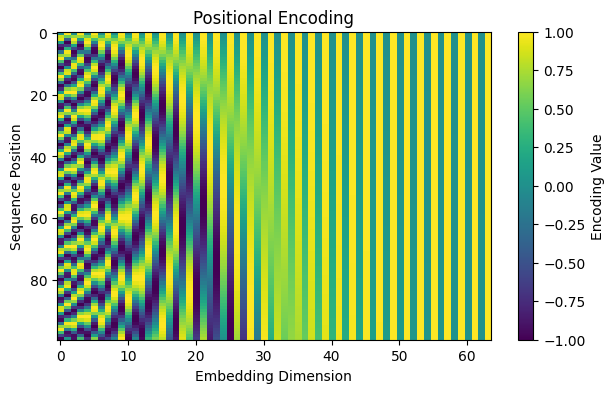

In [8]:
import matplotlib.pyplot as plt

# Positional Encoding Visualization
pos_enc = PositionalEncoding(d_model=64, seq_len=100, dropout=0.1)
pe_matrix = pos_enc.pe.squeeze(0).numpy()  # Shape: (seq_len, d_model)

plt.figure(figsize=(7, 4))
plt.imshow(pe_matrix, cmap="viridis", aspect="auto")
plt.colorbar(label="Encoding Value")
plt.xlabel("Embedding Dimension")
plt.ylabel("Sequence Position")
plt.title("Positional Encoding")
plt.show()